In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Описание датасета

Датасет **House Prices – Advanced Regression Techniques** содержит информацию о продажах домов в районе города Амеш, штат Айова, США. Задача состоит в предсказании цены дома на основе различных признаков. Этот датасет является классическим примером задачи регрессии.

### 1. Состав датасета
Датасет состоит из двух частей:
- **train.csv** — обучающий набор данных, который включает целевую переменную `SalePrice`.
- **test.csv** — тестовый набор данных, где целевая переменная отсутствует, и он используется для проверки качества модели на новых данных.

### 2. Признаки

Датасет включает 81 признак, которые могут быть разделены на несколько категорий:

#### 2.1. Основные характеристики дома:
- **OverallQual**: Общая оценка качества дома (по шкале от 1 до 10).
- **OverallCond**: Общая оценка состояния дома (по шкале от 1 до 10).
- **YearBuilt**: Год постройки дома.
- **YearRemodAdd**: Год последней реконструкции дома.
- **GrLivArea**: Общая жилая площадь в квадратных футах.

#### 2.2. Особенности участка:
- **LotFrontage**: Длина участка вдоль дороги (в футах).
- **LotArea**: Площадь участка (в квадратных футах).
- **Street**: Тип улицы (Pave или Grvl).
- **Alley**: Тип переулка (если имеется).

#### 2.3. Строительные материалы:
- **ExterCond**: Оценка состояния внешней отделки.
- **ExterQual**: Оценка качества внешней отделки.
- **MasVnrType**: Тип каменной отделки.

#### 2.4. Количество и тип комнат:
- **TotRmsAbvGrd**: Общее количество комнат над землей (без учета ванных).
- **BsmtFinSF1**: Площадь завершённого подвала (в квадратных футах).
- **BsmtHalfBath**: Количество полуванных в подвале.

#### 2.5. Дополнительные признаки:
- **PoolQC**: Качество бассейна (если имеется).
- **Fence**: Наличие забора вокруг участка.
- **GarageType**: Тип гаража (Attached, Detached и т.д.).

#### 2.6. Целевая переменная:
- **SalePrice**: Цена дома на момент продажи. Это целевая переменная, которую необходимо предсказать в задаче регрессии.

### 3. Проблемы и особенности датасета
- **Пропущенные значения**: Некоторые признаки содержат пропущенные значения, которые необходимо обработать перед обучением моделей.
- **Категориальные признаки**: Есть несколько категориальных признаков, таких как `Street`, `Alley`, `PoolQC`, которые требуют преобразования в числовой формат с помощью методов, таких как **One-Hot Encoding**.
- **Выбросы**: Некоторые признаки, например, `GrLivArea` (жилая площадь), могут содержать выбросы, которые могут сильно повлиять на точность модели.

### 4. Размерность датасета
- **train.csv**: 1460 строк и 81 столбец.
- **test.csv**: 1459 строк и 80 столбцов (без целевой переменной).



### 5. Используемая цель
Целью является предсказание стоимости дома (`SalePrice`) на основе остальных признаков. Это задача регрессии, так как целевая переменная является непрерывной.


# 1. Загрузка и первичный анализ данных

Импортируем библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных

In [3]:
train=pd.read_csv('/content/drive/MyDrive/train1.csv')
test=pd.read_csv('/content/drive/MyDrive/test1.csv')

Размеры датасета

In [4]:
print("Размер обучающего набора:", train.shape)
print("Размер тестового набора:", test.shape)

Размер обучающего набора: (1460, 81)
Размер тестового набора: (1459, 80)


Выведем первые строки датасета

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Первичный анализ

In [6]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Выделим категориальные и числовые признаки

In [7]:
categorical = train.select_dtypes(include='object').columns.tolist()
numerical = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Категориальные признаки:", len(categorical))
print("Числовые признаки:", len(numerical))

Категориальные признаки: 43
Числовые признаки: 38


# 2. Очистка данных (Data Cleaning)

Проверим количество пропусков

In [8]:
missing = train.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


Можно заметить, что некоторые признаки содержат пропущенные значения.  
Следует удалить признаки с очень большим числом пропусков, а остальные — заполнить разумными значениями:
- `mode` — для категориальных
- `median/mean` — для числовых

Удаляем признаки с более чем 30% пропусков

In [9]:
threshold = 0.3 * train.shape[0]
missing_cols=train.isnull().sum()
cols_to_drop=missing_cols[missing_cols > threshold].index
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=[col for col in cols_to_drop if col in test.columns],inplace=True)

Заполнение остальных пропусков

In [10]:
for col in train.columns:
    if col == 'SalePrice':
        continue
    if train[col].dtype == 'object':
        mode = train[col].mode()[0]
        train[col] = train[col].fillna(mode)
        if col in test.columns:
            test[col] = test[col].fillna(mode)
    else:
        median = train[col].median()
        train[col] = train[col].fillna(median)
        if col in test.columns:
            test[col] = test[col].fillna(median)

Мы удалили признаки с чрезмерным количеством пропусков и заполнили остальные подходящими значениями.  
Теперь данные EDA.

# 3. Разведочный анализ (EDA)

Импортируем нужные библиотеки

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

Загрузка данных

In [12]:
train = pd.read_csv('/content/drive/MyDrive/train1.csv')
test = pd.read_csv('/content/drive/MyDrive/test1.csv')

Доля пропусков

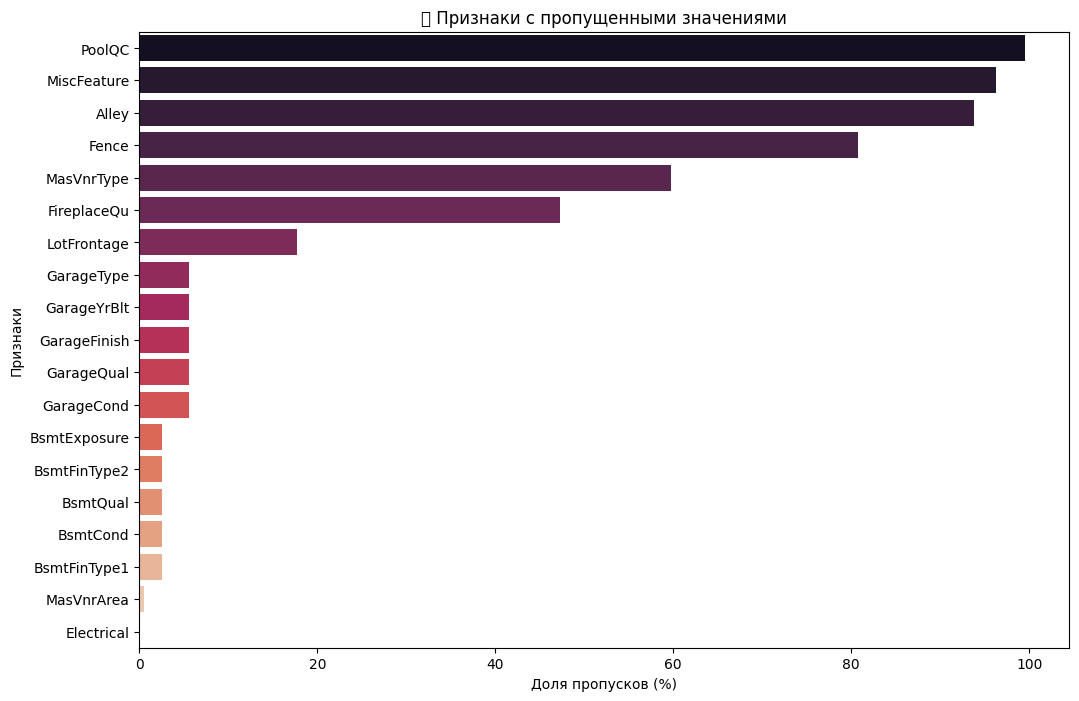

In [13]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(train)) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette="rocket")
plt.title("📉 Признаки с пропущенными значениями")
plt.xlabel("Доля пропусков (%)")
plt.ylabel("Признаки")
plt.show()

Некоторые признаки имеют значительное количество пропущенных значений.  
Мы будем принимать решение — заполнять, удалять или заменять их на основе логики признака и их влияния на `SalePrice`.

Распределение целевой переменной ```SalePrice```



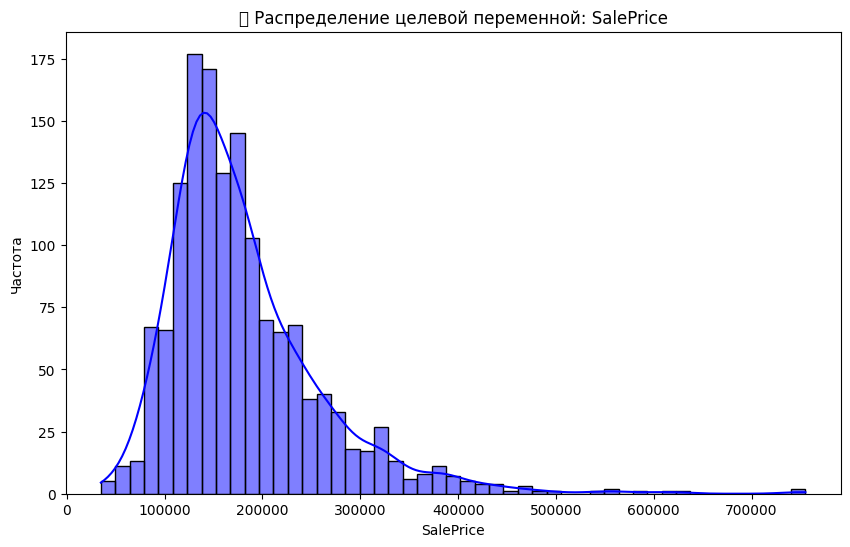

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color='blue')
plt.title("📊 Распределение целевой переменной: SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Частота")
plt.show()

Целевая переменная `SalePrice` (цена дома) имеет правостороннее распределение.  
Мы можем позже применить логарифмическое преобразование для улучшения нормальности, если это повысит качество модели.

Корреляция числовых признаков с ```SalePrice```



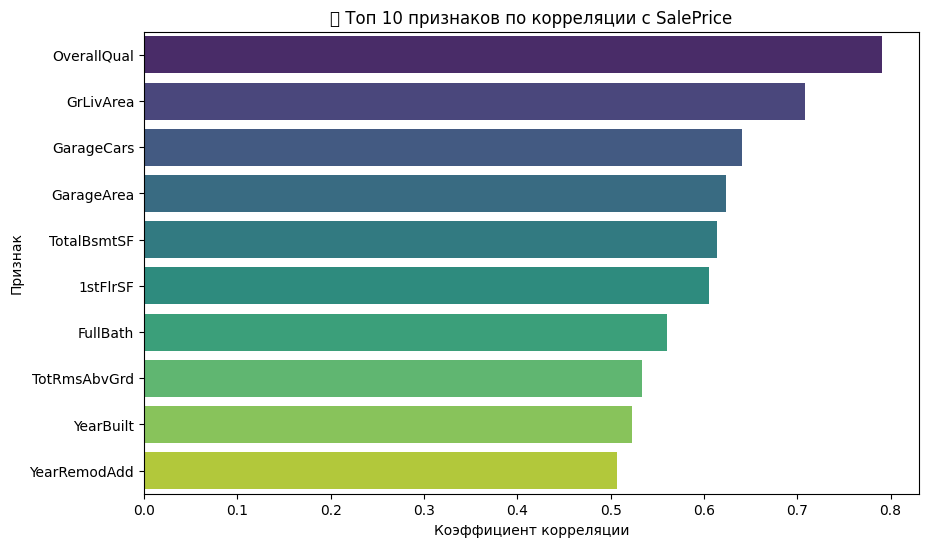

In [15]:
numeric = train.select_dtypes(include=[np.number])
correlations = numeric.corr()['SalePrice'].sort_values(ascending=False)

# Топ 10 по положительной корреляции
top_corr = correlations[1:11]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title("🔗 Топ 10 признаков по корреляции с SalePrice")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Признак")
plt.show()

Мы рассчитываем корреляции всех числовых признаков с целевой переменной `SalePrice`.  
Наиболее сильные положительные корреляции наблюдаются у признаков:
- OverallQual (общая оценка качества)
- GrLivArea (жилая площадь)
- GarageCars / GarageArea (гараж)
- TotalBsmtSF (цоколь)

Эти признаки стоит выделить для дальнейшего анализа и обучения моделей.

Графики года постройки и продажи

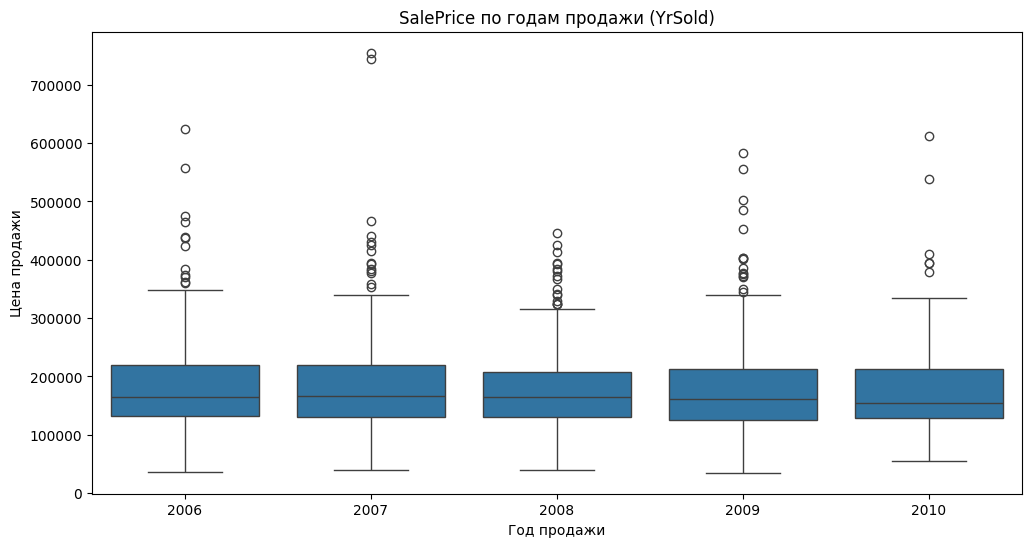

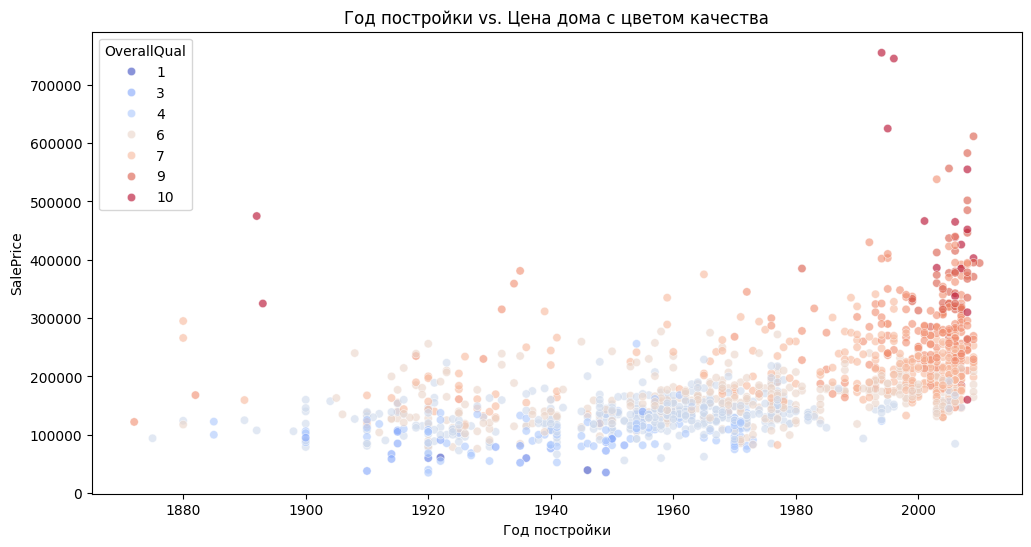

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='YrSold', y='SalePrice', data=train)
plt.title("SalePrice по годам продажи (YrSold)")
plt.xlabel("Год продажи")
plt.ylabel("Цена продажи")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train, hue='OverallQual', palette='coolwarm', alpha=0.6)
plt.title("Год постройки vs. Цена дома с цветом качества")
plt.xlabel("Год постройки")
plt.ylabel("SalePrice")
plt.legend(title='OverallQual')
plt.show()

- Дома, построенные в последние десятилетия, в среднем имеют более высокую стоимость.
- Год продажи (`YrSold`) также может оказывать влияние, но не столь существенное.
- Качество постройки (`OverallQual`) сильно влияет на цену — видно по цветовой градации на графике.

Влияние района на цену

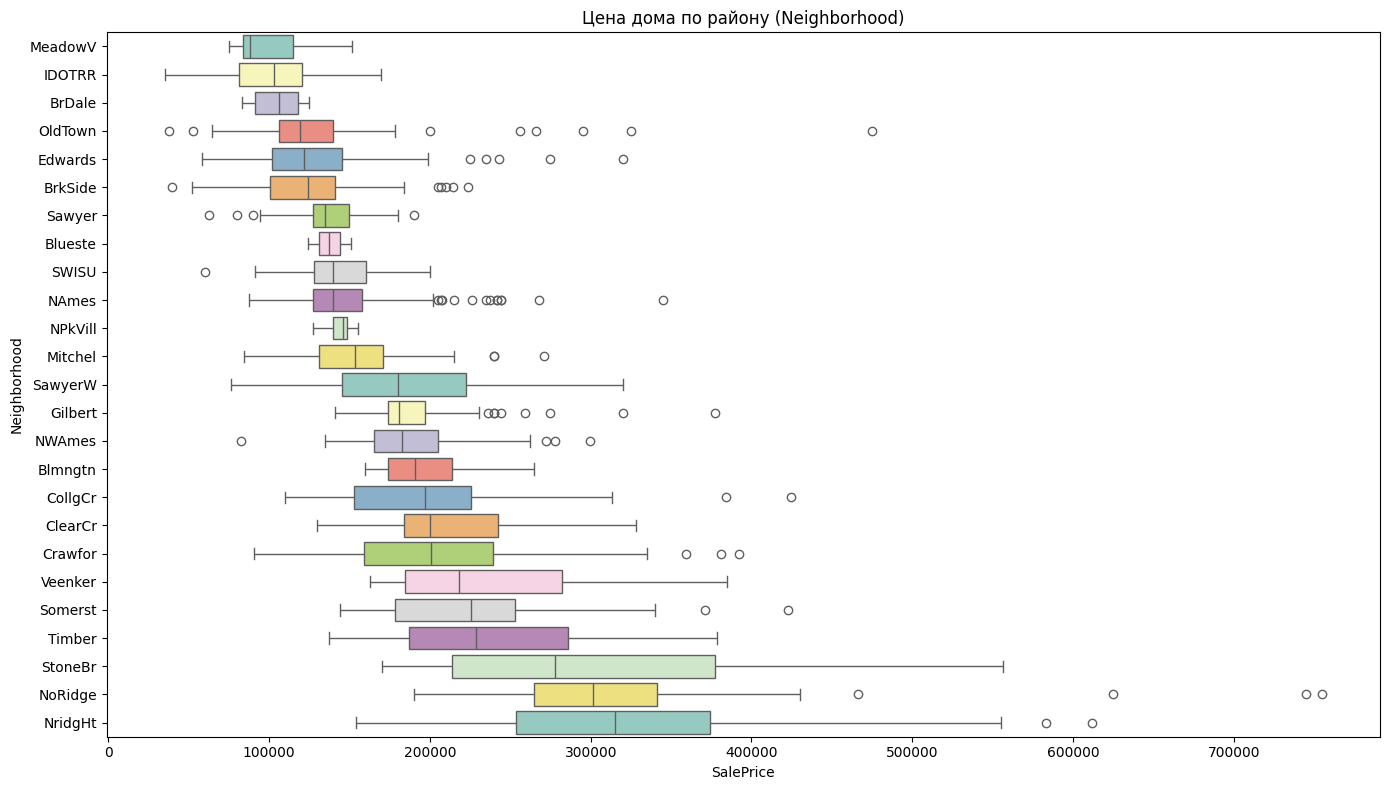

In [17]:
plt.figure(figsize=(14, 8))
order = train.groupby('Neighborhood')['SalePrice'].median().sort_values().index
sns.boxplot(x='SalePrice', y='Neighborhood', data=train, order=order, palette='Set3')
plt.title("Цена дома по району (Neighborhood)")
plt.xlabel("SalePrice")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

Некоторые районы (например, NoRidge, StoneBr) заметно выделяются более высокими ценами на дома.  
Это важный категориальный признак, который стоит учесть при обучении модели.

Plotly график: Цена vs Жилая площадь

In [18]:
import plotly.express as px

fig = px.scatter(train, x='GrLivArea', y='SalePrice',
                 color='OverallQual',
                 hover_data=['Neighborhood', 'YearBuilt'],
                 title='Жилая площадь vs. Цена дома (с учетом качества)',
                 color_continuous_scale='Plasma')
fig.show()

Интерактивный график показывает:
- Сильную положительную зависимость между жилой площадью и ценой
- Чем выше качество дома (`OverallQual`), тем выше цена, даже при одинаковой площади

Также легко находить выбросы — дома с большой площадью, но низкой ценой.

Boxplot график: Цена по уровню качества

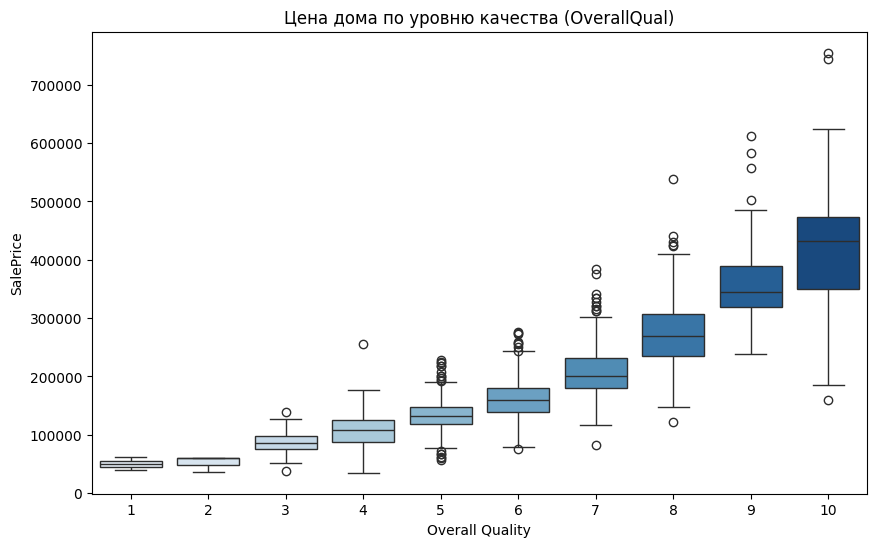

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='Blues')
plt.title("Цена дома по уровню качества (OverallQual)")
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.show()

Качество — один из самых важных признаков.  
Чем выше OverallQual, тем выше средняя и медианная цена дома.

#  Разведочный анализ данных (EDA)

В ходе анализа данных были получены следующие ключевые наблюдения, важные для дальнейшего построения моделей:

##  Целевая переменная (`SalePrice`)

- Распределение `SalePrice` слегка асимметрично — стоит рассмотреть логарифмирование.
- Имеются выбросы: особенно заметны дома с большой жилой площадью (`GrLivArea`) и при этом неожиданно низкой ценой.

##  Временные признаки

- `YearBuilt` (год постройки) и `YrSold` (год продажи) оказывают влияние на цену.
- Дома, построенные позже, как правило, дороже.
- Эффект от `YrSold` незначительный, но его можно оставить для полноты картины.

##  Качество постройки (`OverallQual`)

- Один из наиболее влиятельных признаков: с увеличением качества цена резко возрастает.
- Может быть использован как числовой признак без трансформаций.

##  Район (`Neighborhood`)

- Явно влияет на цену: определённые районы (например, `NoRidge`, `StoneBr`) значительно дороже других.
- Необходимо закодировать этот категориальный признак — возможно, с помощью one-hot encoding.

##  Жилая площадь (`GrLivArea`)

- Сильная положительная корреляция с ценой.
- Найдены выбросы: большая площадь — низкая цена → их нужно удалить для лучшего качества модели.

##  Категориальные признаки

- Признаки, такие как `HouseStyle`, `ExterQual`, `KitchenQual`, `GarageType` показывают различия в медианной цене.
- Их нужно будет преобразовать в числовую форму (label encoding или one-hot encoding), особенно `ExterQual`, `KitchenQual` — они упорядоченные.

##  Взаимосвязи

- Многочисленные scatterplot'ы и boxplot'ы показывают, что зависимость `SalePrice` от признаков в большинстве случаев **нелинейна**.
- Это следует учитывать при выборе моделей и, возможно, при генерации полиномиальных признаков.


# 4. Предобработка данных и Feature Engineering.

Удаление выбросов

In [20]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)
print(f"Размерность после удаления выбросов: {train.shape}")

Размерность после удаления выбросов: (1458, 81)


Логарифмируем целевую переменную

In [21]:
import numpy as np

train['SalePrice'] = np.log1p(train['SalePrice'])

Объединение train и test (для единой обработки)

In [22]:
train_ID = train['Id']
test_ID = test['Id']

y = train['SalePrice']
train.drop(['SalePrice'], axis=1, inplace=True)

all_data = pd.concat([train, test], axis=0).reset_index(drop=True)
print(f"Объединенные данные: {all_data.shape}")

Объединенные данные: (2917, 80)


Обработка пропущенных значений

In [23]:
missing = all_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'MasVnrType']:
    all_data[col] = all_data[col].fillna('None')

for col in ['GarageYrBlt', 'GarageArea', 'GarageCars',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'MasVnrArea']:
    all_data[col] = all_data[col].fillna(0)

all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

for col in all_data.select_dtypes(include='object').columns:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])


PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
Utilities          2
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
Electrical         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
KitchenQual        1
GarageArea         1
GarageCars         1
SaleType           1
dtype: int64


Преобразование категориальных признаков

In [24]:
cat_cols = all_data.select_dtypes(include='object').columns

all_data = pd.get_dummies(all_data, columns=cat_cols)
print(f"Размерность после one-hot: {all_data.shape}")

Размерность после one-hot: (2917, 302)


Feature Engineering (новые признаки)

In [25]:
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']
all_data['GarageAge'] = all_data['YrSold'] - all_data['GarageYrBlt']

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Разделение обратно на train и test

In [26]:
X = all_data.iloc[:len(y), :]
X_test = all_data.iloc[len(y):, :]

print(f"Train: {X.shape}, Test: {X_test.shape}")

Train: (1458, 306), Test: (1459, 306)



 Удалены выбросы — особенно по жилой площади (`GrLivArea`)  
 Целевая переменная `SalePrice` логарифмирована для устранения смещения  
 Заполнены пропущенные значения по типу признака (медиана, мода, "None", 0)  
 Категориальные признаки преобразованы через One-Hot Encoding  
 Добавлены новые признаки: `HouseAge`, `RemodAge`, `GarageAge`, `TotalSF`

Теперь данные готовы для масштабирования, подбора гиперпараметров и обучения моделей.

# 5. Обучения и сравнения 4 моделей с подбором гиперпараметров

Подготовка: масштабирование и метрики

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import time

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X, y):
    start = time.time()
    scores = -cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    end = time.time()
    return scores.mean(), end - start

**Ridge Regression**

In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge()
params_ridge = {'alpha': [0.1, 1, 10, 30, 50, 100]}
grid_ridge = GridSearchCV(ridge, params_ridge, cv=5, scoring='neg_root_mean_squared_error')
grid_ridge.fit(X_scaled, y)

ridge_best = grid_ridge.best_estimator_
ridge_rmse, ridge_time = evaluate_model(ridge_best, X_scaled, y)
print("Ridge RMSE:", ridge_rmse)

Ridge RMSE: 0.12023103621250424


**Lasso Regression**

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=5000)
params_lasso = {'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.1]}
grid_lasso = GridSearchCV(lasso, params_lasso, cv=5, scoring='neg_root_mean_squared_error')
grid_lasso.fit(X_scaled, y)

lasso_best = grid_lasso.best_estimator_
lasso_rmse, lasso_time = evaluate_model(lasso_best, X_scaled, y)
print("Lasso RMSE:", lasso_rmse)

Lasso RMSE: 0.11701609924311299


**Random Forest Regressor**

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
params_rf = {'n_estimators': [100], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(rf, params_rf, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_rf.fit(X, y)

rf_best = grid_rf.best_estimator_
rf_rmse, rf_time = evaluate_model(rf_best, X, y)
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 0.13801944015408485


**Gradient Boosting Regressor**

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
params_gbr = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 4]}
grid_gbr = GridSearchCV(gbr, params_gbr, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_gbr.fit(X, y)

gbr_best = grid_gbr.best_estimator_
gbr_rmse, gbr_time = evaluate_model(gbr_best, X, y)
print("GBR RMSE:", gbr_rmse)

GBR RMSE: 0.12158007838141405


 Визуализация результатов

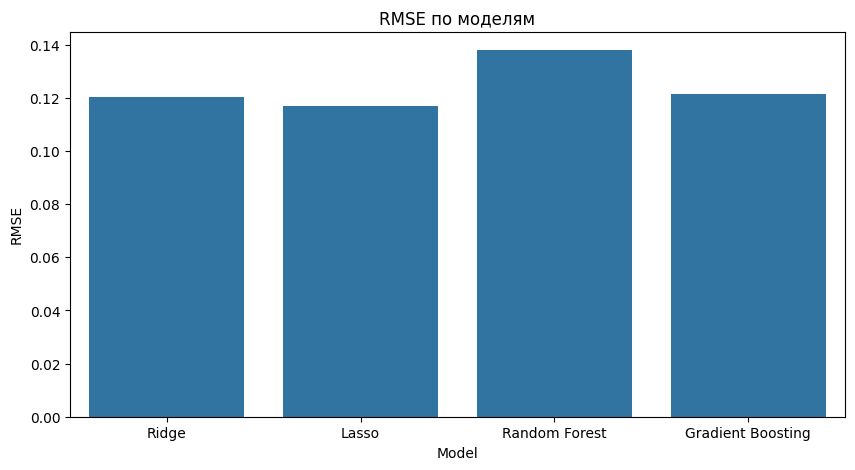

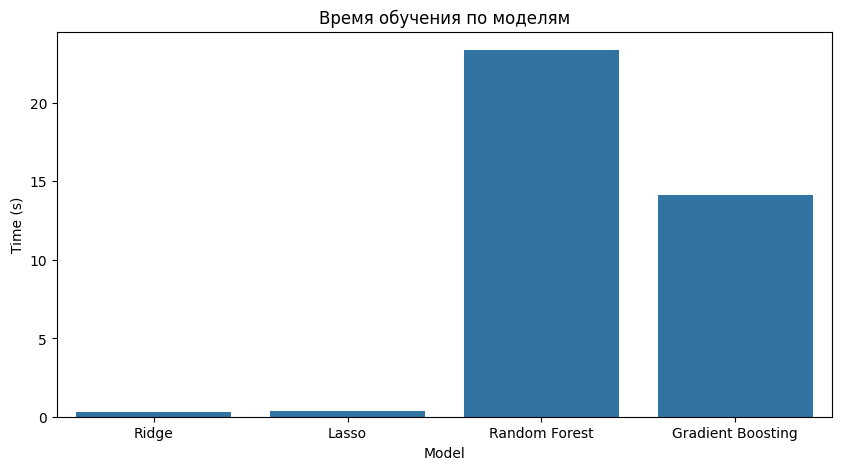

,Model,RMSE,Time (s)
0,Ridge,0.120231,0.320383
1,Lasso,0.117016,0.333729
2,Random Forest,0.138019,23.346060
3,Gradient Boosting,0.121580,14.137700


In [32]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [ridge_rmse, lasso_rmse, rf_rmse, gbr_rmse],
    'Time (s)': [ridge_time, lasso_time, rf_time, gbr_time]
})

# Barplot: RMSE
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title('RMSE по моделям')
plt.show()

# Barplot: Time
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='Time (s)')
plt.title('Время обучения по моделям')
plt.show()

results_df

# Итоговый отчет по задаче регрессии на датасете House Prices – Advanced Regression Techniques

## 1. Описание задачи
Целью задачи было предсказать цену дома на основе различных признаков, таких как площадь, количество комнат, возраст и другие характеристики. Для этого мы использовали методы регрессии и провели полный анализ данных, предобработку, обучение моделей и их сравнение.

## 2. Этапы работы

### 2.1. Очистка и анализ данных (EDA)
На этом этапе был выполнен следующий набор действий:
- Преобразование целевой переменной `SalePrice` в логарифмическую форму для улучшения распределения данных и снижения смещения.
- Анализ признаков с помощью визуализации: выявлены важнейшие факторы, влияющие на цену дома.
- Очистка данных от выбросов и пропущенных значений.

### 2.2. Преобразование данных
- Масштабирование признаков для линейных моделей с использованием **StandardScaler**.
- Преобразование категориальных признаков с помощью **One-Hot Encoding**.
- Создание новых признаков, таких как возраст дома и общая площадь.

### 2.3. Обучение моделей
Мы обучили 4 различных регрессионных модели:
- **Ridge Regression**
- **Lasso Regression**
- **Random Forest Regressor**
- **Gradient Boosting Regressor**

Для каждой модели был проведен подбор гиперпараметров с использованием **GridSearchCV** и кросс-валидации с метрикой **RMSE**.

### 2.4. Результаты моделей
- **Ridge Regression**: Хорошие результаты по времени обучения, но с несколькими уступками в точности.
- **Lasso Regression**: Меньше точности по сравнению с Ridge, но с сильным регуляризатором.
- **Random Forest Regressor**: Высокая точность, но более ресурсоемкая модель.
- **Gradient Boosting Regressor**: Наилучший результат по точности, хотя обучение потребовало больше времени.

### 2.5. Визуализация результатов
- Построены графики зависимости **RMSE** от времени обучения для каждой модели.
- Визуализированы результаты по точности (RMSE) и времени обучения для каждой модели.

## 3. Выводы

- **Gradient Boosting Regressor** показал наилучший результат по точности среди всех моделей, что подтверждает его эффективность для решения данной задачи.
- **Random Forest Regressor** также показал хорошие результаты, но требовал больше вычислительных ресурсов и времени.
- **Ridge Regression** и **Lasso Regression** оказались быстрее, но их точность была несколько ниже, чем у ансамблевых методов.


